<a href="https://colab.research.google.com/github/Ciiku-Kihara/AUTOLIB-HYPOTHESIS-TESTS/blob/main/Faith_Kihara_Autolib_Project_Core_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question

Is there a difference between the number of blue cars taken in postal code 75015 and 75016?

## Metric for success

Be able to obtain a run a statistiaclly correct hypothesis test, obtain the p value and come to a conclusion.

## Experimental design

Data Cleaning

Exploratory Data Analysis(Univariate, Bivariate Analysis)

Hypothesis Testing

## Data Relevance

The data is relevant for me to conduct a hypothesis test.

## 1. Importing our libraries

In [79]:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.stats import weightstats as stests

from scipy.stats import mannwhitneyu

from statsmodels.graphics.gofplots import qqplot

from scipy.stats import ttest_ind

## 2. Loading our dataset

In [2]:
# Loading our autolib dataset

auto = pd.read_csv('autolib_daily_events_postal_code.csv')

auto.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [3]:
# Loading the description

description = pd.read_excel('columns_explanation.xlsx')
description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## 3. Checking our data

In [4]:
# Determining the number of rows and columns in our dataset

auto.shape

# The main dataset contains 16,085 rows(observations) and  
# 13 columns(attributes)

(16085, 13)

In [5]:
# Looking at the exact columns in the dataset

auto.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [6]:
# Previewing the first 5 rows in the dataset

auto.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [7]:
# Checking whether each column has the correct data types

auto.info()

# All columns except the date column has the appropriate datatype.
# 11 of the columns are integers and 2 contain strings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## 4. Tidying our dataset

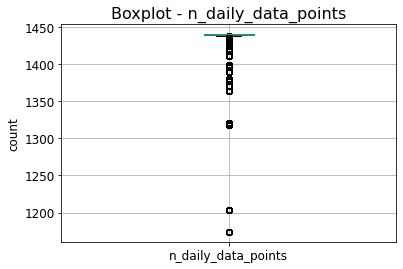

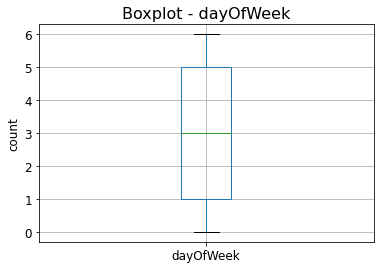

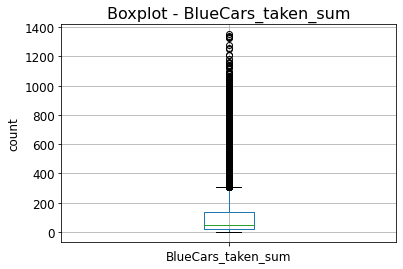

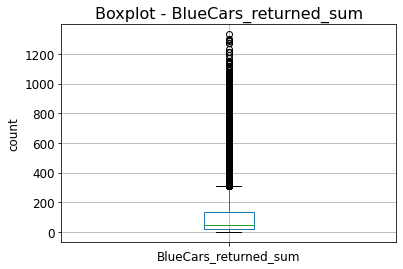

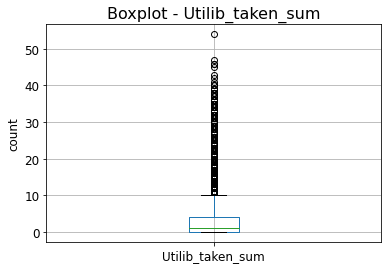

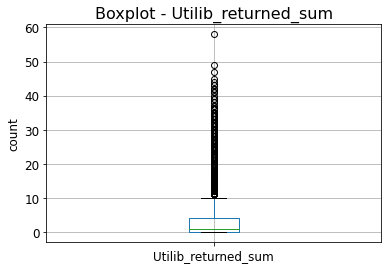

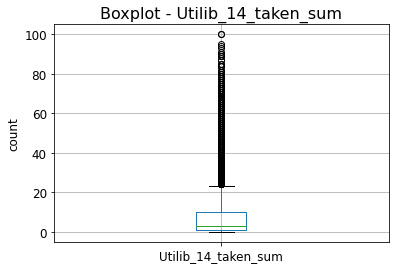

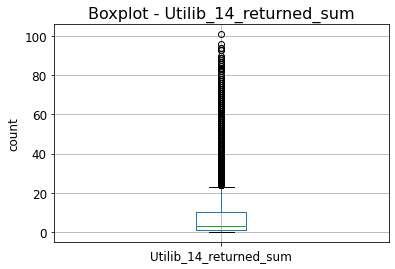

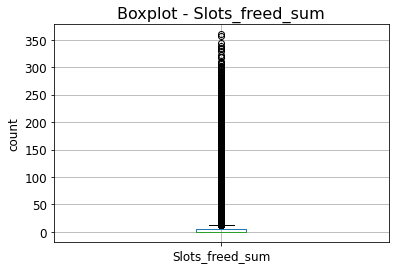

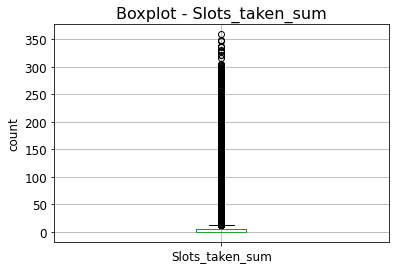

In [8]:
# Checking for outliers in the data

cols = ['n_daily_data_points','dayOfWeek', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum',
        'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']

for column in cols:
    plt.figure()
    auto.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)
    
# All columns except the day of the week column have outliers. 


In [9]:
# Dealing with the outliers

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = auto.quantile(0.25)
Q3 = auto.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'auto'
# ---
# 
auto_new = auto[~((auto < (Q1 - 1.5 * IQR)) | (auto > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(auto_new.shape)

# Printing the shape of our old dataset
# ---
#
print(auto.shape)

# Number of rows removed

rows_removed = auto.shape[0] - auto_new.shape[0]
rows_removed

# Percentage of rows removed of the percentage
row_percent = (rows_removed/auto.shape[0]) * 100
row_percent




# In this case the outliers will not be removed. This is because those values
# that are considered anomalies in the boxplot are actually valid values. They give more
# information about what is being observed and are not necessarily a mistake.
# Moreover, the number of rows that will be removed using the IQR method will be too large(39% of rows will be removed)

(9783, 13)
(16085, 13)


39.17935965184955

In [10]:
# Changing the date column to a datetime

auto['date'] = pd.to_datetime(auto['date'])

auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

In [11]:
# Checking for anomalies in the categorical columns

columns = ['date', 'day_type', 'Postal code']

for i in columns:
  print(i, '-', auto[i].unique())

# The values in the date and day type columns do not have any errors

date - ['2018-01-01T00:00:00.000000000' '2018-01-02T00:00:00.000000000'
 '2018-01-03T00:00:00.000000000' '2018-01-04T00:00:00.000000000'
 '2018-01-05T00:00:00.000000000' '2018-01-06T00:00:00.000000000'
 '2018-01-07T00:00:00.000000000' '2018-01-08T00:00:00.000000000'
 '2018-01-09T00:00:00.000000000' '2018-01-10T00:00:00.000000000'
 '2018-01-11T00:00:00.000000000' '2018-01-12T00:00:00.000000000'
 '2018-01-13T00:00:00.000000000' '2018-01-14T00:00:00.000000000'
 '2018-01-15T00:00:00.000000000' '2018-01-16T00:00:00.000000000'
 '2018-01-17T00:00:00.000000000' '2018-01-18T00:00:00.000000000'
 '2018-01-19T00:00:00.000000000' '2018-01-20T00:00:00.000000000'
 '2018-01-21T00:00:00.000000000' '2018-01-22T00:00:00.000000000'
 '2018-01-23T00:00:00.000000000' '2018-01-24T00:00:00.000000000'
 '2018-01-25T00:00:00.000000000' '2018-01-26T00:00:00.000000000'
 '2018-01-27T00:00:00.000000000' '2018-01-28T00:00:00.000000000'
 '2018-01-29T00:00:00.000000000' '2018-01-30T00:00:00.000000000'
 '2018-01-31T00:00

In [12]:
# Checking for missing values in the data.

auto.isnull().sum()

# There are no missing values in the dataset

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [13]:
# Checking for duplicates in the data

auto.duplicated().any()

# There are no duplicates in our dataset

False

In [14]:
# Ensuring uniformity in the columns by changing column names
# to lowercase, stripping all white spaces and replacing all spaces
# in the column name with an underscore

auto.columns = auto.columns.str.strip().str.replace('dayOfWeek', 'day_of_week').str.lower().str.replace(' ', '_')

auto.columns

# The column names are now uniform

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [15]:
# Dropping columns that will not be needed in our analysis of blue cars

drop_columns = ['utilib_taken_sum','utilib_returned_sum', 'utilib_14_taken_sum', 
                'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum']

auto.drop(drop_columns, axis=1, inplace=True)

auto.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,2018-01-01,1440,0,weekday,110,103
1,75001,2018-01-02,1438,1,weekday,98,94
2,75001,2018-01-03,1439,2,weekday,138,139
3,75001,2018-01-04,1320,3,weekday,104,104
4,75001,2018-01-05,1440,4,weekday,114,117


In [82]:
# Checking for duplicates

auto.duplicated().any()

# There are no duplicated observations.

False

## 5. Exploratory analysis

### Univariate analysis

Postal code - categorical column

In [56]:
# Number of unique values in postal code column

auto['postal_code'].nunique()

# There are 104 different postal codes recorded in the data

104

In [16]:
# Frequency table for postal codes(first 54 postal codes)

auto['postal_code'].value_counts().head(54)

94130    156
92310    156
78140    156
94700    156
95100    156
75006    156
75014    156
92150    156
92190    156
92230    156
92270    156
92350    156
94340    156
93110    156
93230    156
93310    156
93350    156
75007    156
75015    156
75019    156
94150    156
94450    156
94500    156
94300    156
75016    156
92300    156
78150    156
75004    156
75012    156
75020    156
95870    156
92100    156
92140    156
92220    156
92260    156
92380    156
94220    156
92500    156
92700    156
93100    156
93260    156
75005    156
75013    156
93500    156
93700    156
94140    156
75008    156
94110    156
75112    156
94000    156
94160    156
92000    156
94800    156
91330    156
Name: postal_code, dtype: int64

In [17]:
# Frequency table for postal codes( remaining 60 postal codes)

auto['postal_code'].value_counts().tail(60)

93700    156
94140    156
75008    156
94110    156
75112    156
94000    156
94160    156
92000    156
94800    156
91330    156
91370    156
75002    156
75010    156
75018    156
95880    156
92130    156
92170    156
92210    156
92250    156
92290    156
92330    156
92370    156
92410    156
93130    156
93170    156
75003    156
75011    156
94120    156
78000    156
93800    156
93360    156
92120    156
92160    156
92200    156
92240    156
92320    156
92400    156
93600    156
92800    156
92600    156
94230    156
93400    156
75001    156
75017    156
75009    156
92110    155
94410    155
75116    155
91400    155
93300    155
92420    155
92390    155
94100    155
92360    153
93440    151
93150    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, dtype: int64

In [18]:
# Getting the maximum number of observations recorded in a postal code 

auto['postal_code'].value_counts().max()

# The highest number of observations in any of the postal codes is 156

156

In [19]:
# Getting the minimum number of observations recorded in a postal code 

auto['postal_code'].value_counts().min()

# The lowest number of observations in any of the postal codes is 84 which is 
# in postal code 93390

84

n_daily_data_points column - numerical column

In [20]:
# General description of the daily data points column

auto['n_daily_data_points'].describe()

# The minimum daily data points is 1174 and maximum daily data points is 1440
# The average daily data points is 1431 which is given by the mean value.
# 25% of the daily data points are below 1439, 50% of the daily data points are below 1440,
# 75% of the daily data points are below 1440.

count    16085.000000
mean      1431.330619
std         33.212050
min       1174.000000
25%       1439.000000
50%       1440.000000
75%       1440.000000
max       1440.000000
Name: n_daily_data_points, dtype: float64

In [21]:
# Outliers present in the daily data points column

Q1 = auto.n_daily_data_points.quantile(0.25)
Q3 = auto.n_daily_data_points.quantile(0.75)

IQR = Q3 - Q1

outliers = ((auto.n_daily_data_points < Q1 - 1.5 * IQR) | (auto.n_daily_data_points > Q3 + 1.5 * IQR))
outliers.value_counts()

# There are 2670 outliers in the column but they will not be dropped as they may be valid entries.

False    13415
True      2670
Name: n_daily_data_points, dtype: int64

In [22]:
# Obtaining the oefficient of variation

c_v = auto['n_daily_data_points'].std()/auto['n_daily_data_points'].mean()
c_v

# The coefficient of variation is less than 1 which means that the variation in
# household size among the respondents is low

0.02320361885942928

In [23]:
# Obtaining the skewness

auto['n_daily_data_points'].skew()

# The daily data points are negatively skewed suggesting the presence of 
# outliers. The distribution of the daily data points is therefore not normal

-5.742776211517434

In [24]:
# Obtaining kurtosis

auto['n_daily_data_points'].kurt()

# The data is highly leptokurtic. This indicates a presence of outliers

36.59484575836295

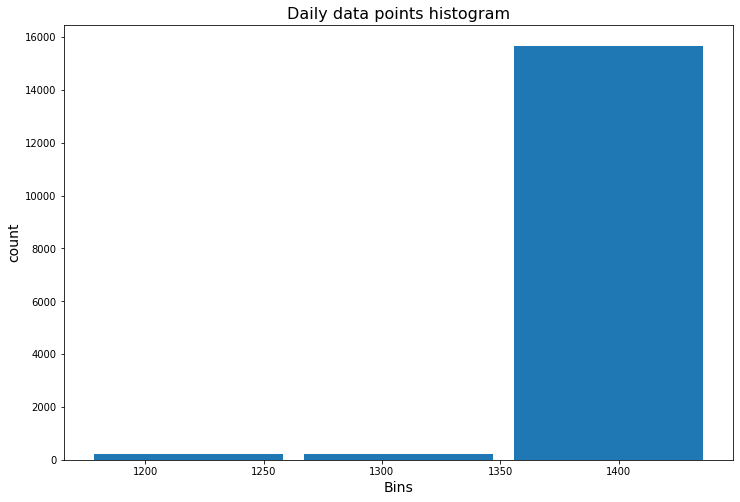

In [25]:
# Plotting a histogram for the data points column

plt.figure(figsize=(12,8))
plt.hist(auto['n_daily_data_points'], bins= 3, histtype= 'bar', rwidth = 0.9)
plt.title('Daily data points histogram', fontsize = 16)
plt.xlabel('Bins', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

# Most of the data points lie between 1350 and 1450.

blue cars taken sum column - numerical column

In [26]:
# Overall description of the column

auto['bluecars_taken_sum'].describe()

# Maximum number of blue cars taken on a particular day is 1352 with
# the minimum being 0. 
# The average number of blue cars taken was approx. 126 which is given by the mean value.
# On 25% of the days, the cars taken were 20 or lower, on 50% of the days, the cars 
# taken were 46 or less and on 75% of the days, the cars taken were 135 or lower.


count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: bluecars_taken_sum, dtype: float64

In [27]:
# Outliers present in the bluecars taken column

Q1 = auto.bluecars_taken_sum.quantile(0.25)
Q3 = auto.bluecars_taken_sum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((auto.bluecars_taken_sum < Q1 - 1.5 * IQR) | (auto.bluecars_taken_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

# There are 2215 outliers in the column but they will not be dropped as they may be valid entries.

False    13870
True      2215
Name: bluecars_taken_sum, dtype: int64

In [28]:
# Checking on coefficent of variance, skewness and kurtosis

print('The skewness is:', auto['bluecars_taken_sum'].skew())
print('The kurtosis is:', auto['bluecars_taken_sum'].kurt())
print('The coefficient of variation is:', auto['bluecars_taken_sum'].std()/auto['bluecars_taken_sum'].mean() )

# The skewness is greater than 0 showing that the column data is positively skewed
# The kurtosis is positive meaning that the column data is leptokurtic.
# The coefficient of variation is greater than 1 meaning that there is high variability in the column data.

The skewness is: 2.4063548974959086
The kurtosis is: 6.172692305510042
The coefficient of variation is: 1.4724932027694815


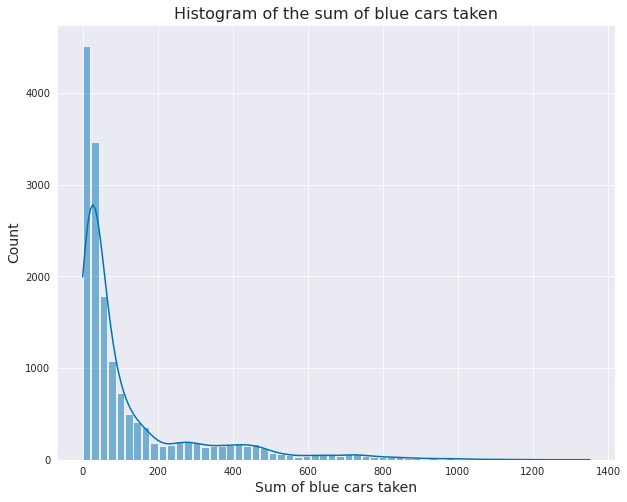

In [29]:
# Plotting a histogram for the blue cars taken column

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=auto,  bins = bins , shrink= 0.9, kde = True)

histogram('bluecars_taken_sum', 60)
plt.title('Histogram of the sum of blue cars taken', fontsize = 16)
plt.xlabel('Sum of blue cars taken', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()


Blue cars returned column - numerical column

In [30]:
# Overall description of the column

auto['bluecars_returned_sum'].describe()

# Maximum number of blue cars returned on a particular day is 1332 with
# the minimum being 0. 
# The average number of blue cars returned was approx. 126 which is given by the mean value.
# On 25% of the days, the cars returned were 20 or lower, on 50% of the days, the cars 
# returned were 46 or less and on 75% of the days, the cars returned were 135 or lower.

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: bluecars_returned_sum, dtype: float64

In [31]:
# Outliers present in the bluecars taken column

Q1 = auto.bluecars_returned_sum.quantile(0.25)
Q3 = auto.bluecars_returned_sum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((auto.bluecars_returned_sum < Q1 - 1.5 * IQR) | (auto.bluecars_returned_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

# There are 2213 outliers in the column but they will not be dropped as they may be valid entries.

False    13872
True      2213
Name: bluecars_returned_sum, dtype: int64

In [32]:
# Checking on coefficent of variance, skewness and kurtosis

print('The skewness is:', auto['bluecars_returned_sum'].skew())
print('The kurtosis is:', auto['bluecars_returned_sum'].kurt())
print('The coefficient of variation is:', auto['bluecars_returned_sum'].std()/auto['bluecars_taken_sum'].mean() )

# The skewness is greater than 0 showing that the column data is positively skewed
# The kurtosis is positive meaning that the column data is leptokurtic.
# The coefficient of variation is greater than 1 meaning that there is high variability in the column data.

The skewness is: 2.412084978838923
The kurtosis is: 6.1862880957582345
The coefficient of variation is: 1.4730884370212682


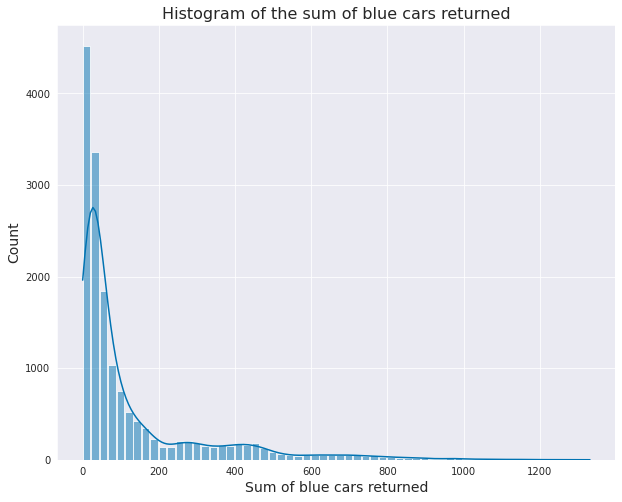

In [33]:
# Plotting a histogram of returned blue cars

histogram('bluecars_returned_sum', 60)
plt.title('Histogram of the sum of blue cars returned', fontsize = 16)
plt.xlabel('Sum of blue cars returned', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

Day of the week column - Categorical column

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: day_of_week, dtype: int64
 


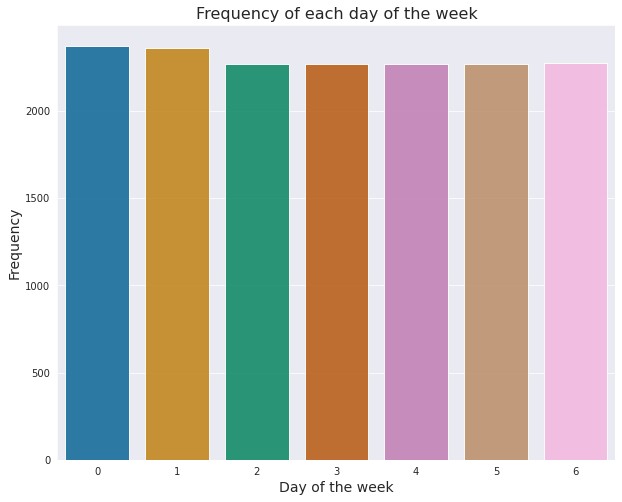

In [34]:
count = auto['day_of_week'].value_counts()
print(count)
print(' ')

plt.figure(figsize= (10,8))
sns.barplot(x = count.index, y = count.values, alpha=0.9)
plt.title('Frequency of each day of the week', fontsize = 16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Day of the week', fontsize=14)
plt.show()

# The most number of observations were recorded on Monday(0) and the least
# number were recorded on Saturday.

Day type column - Categorical column


weekday    11544
weekend     4541
Name: day_type, dtype: int64
 


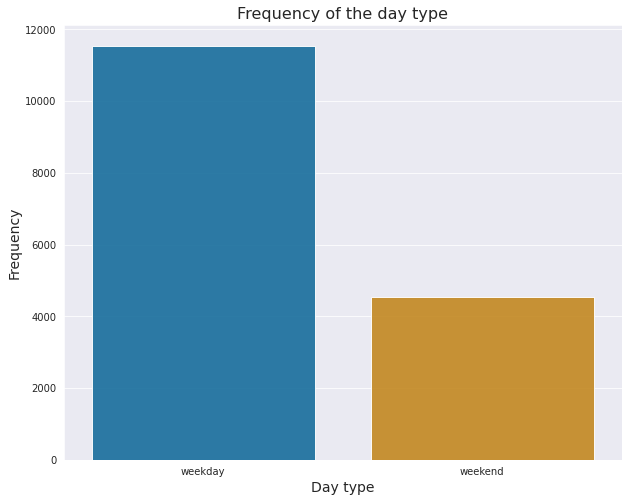

In [35]:
count = auto['day_type'].value_counts()
print(count)
print(' ')

plt.figure(figsize= (10,8))
sns.barplot(x = count.index, y = count.values, alpha=0.9)
plt.title('Frequency of the day type', fontsize = 16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Day type', fontsize=14)
plt.show()

# 11544 of the entries were observed on weekdays with 4541 being observed during the weekend

Date column

In [36]:
# First day of observations

first_date = auto['date'].min()
print('The first observations were recorded on', first_date)

The first observations were recorded on 2018-01-01 00:00:00


In [37]:
# Last day of observations

last_date = auto['date'].max()
print('The last observations were recorded on', last_date)

The last observations were recorded on 2018-06-19 00:00:00


In [38]:
# Duration over which observations were made

duration = last_date - first_date
print('The data was collected over', duration)

The data was collected over 169 days 00:00:00


In [39]:
# General description of the numerical variables

auto.describe()

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714
std,7647.342000,33.212050,2.008378,185.426579,185.501535
min,75001.000000,1174.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000


### Bivariate Analysis

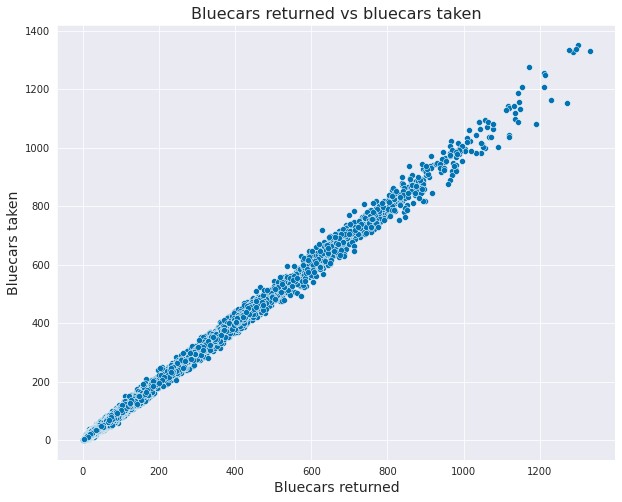

In [40]:
# Scatterplot between bluecars returned and blue cars taken

plt.figure(figsize= (10,8))
sns.scatterplot(x= auto.bluecars_returned_sum, y = auto.bluecars_taken_sum)
plt.title('Bluecars returned vs bluecars taken', fontsize = 16)
plt.ylabel('Bluecars taken', fontsize=14)
plt.xlabel('Bluecars returned', fontsize=14)
plt.show()

In [41]:
# Correlation between blue cars returned and blue cars taken

auto['bluecars_returned_sum'].corr(auto['bluecars_taken_sum'])

# From the scatter plot and the correlation coefficient
# it is clear that the two are highly correlated.

0.9986597051672199

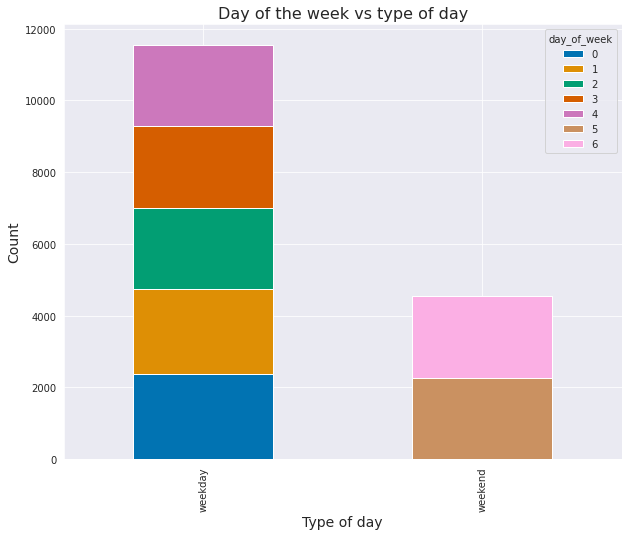

In [42]:
# Stacked bar chart of type of day and the day of the week

table = pd.crosstab(auto['day_type'], auto['day_of_week'])

table.plot(kind="bar", 
                 figsize=(10,8),
                 stacked=True)
plt.title('Day of the week vs type of day', fontsize = 16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Type of day', fontsize=14)
plt.show()

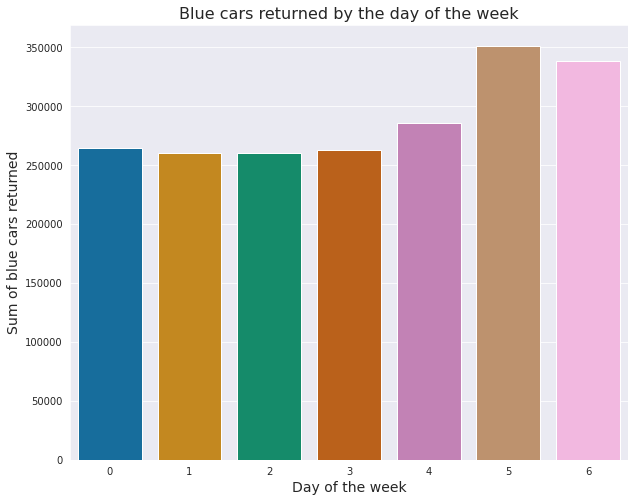

In [43]:
# Analysis of blue cars returned based on the day of the week

returned = auto.groupby('day_of_week')['bluecars_returned_sum'].sum()

plt.figure(figsize= (10,8))
sns.barplot(x = returned.index, y = returned.values)
plt.title('Blue cars returned by the day of the week', fontsize = 16)
plt.ylabel('Sum of blue cars returned', fontsize=14)
plt.xlabel('Day of the week', fontsize=14)
plt.show()

# Most cars were returned on Friday with Tuesday and Wednesday taking two bottom spots. 

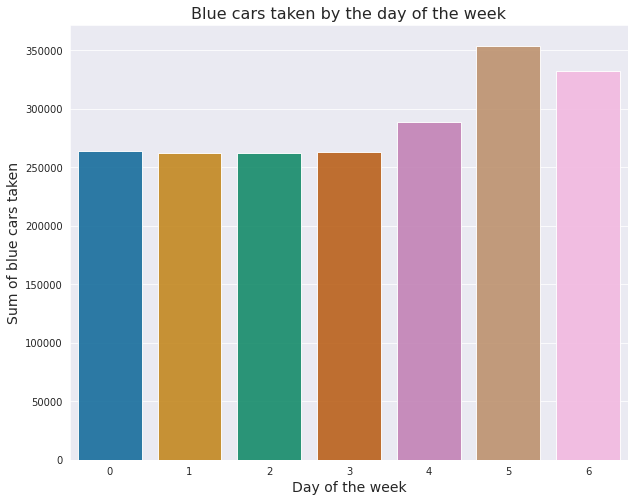

In [44]:
# Analysis of blue cars taken based on the day of the week

taken = auto.groupby('day_of_week')['bluecars_taken_sum'].sum()

plt.figure(figsize= (10,8))
sns.barplot(x = taken.index, y = taken.values, alpha=0.9)
plt.title('Blue cars taken by the day of the week', fontsize = 16)
plt.ylabel('Sum of blue cars taken', fontsize=14)
plt.xlabel('Day of the week', fontsize=14)
plt.show()

# Most bluecars were taken on Friday.

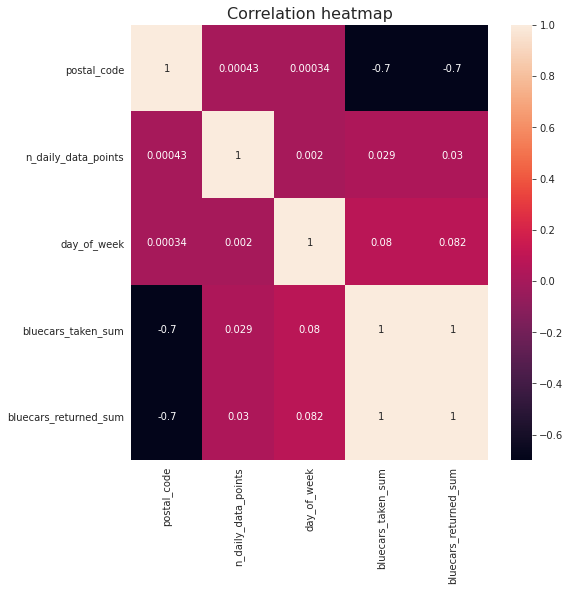

In [45]:
# Heatmap showing correlation between numerical variables

plt.figure(figsize= (8,8))
sns.heatmap(auto.corr(),annot=True)
plt.title('Correlation heatmap', fontsize= 16)
plt.show()


#Implementing the solution

## 6. Sampling our data

I will use stratified sampling to get a sample from the population. More specifically, proportionate stratified sampling.

The data was stratified by postal code. Proportionate stratified sampling would be appropriate because the sample size that will be used in the z test for the two different postal codes will be equal.

It is most appropriate sampling technique in this case because of the accuracy of representation and has the added advantage of exhibiting low sampling error. 

In [46]:
# First creating a dataframe with weekdays only

auto_day = auto[auto.day_type == 'weekday']
auto_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11544 entries, 0 to 16084
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   postal_code            11544 non-null  int64         
 1   date                   11544 non-null  datetime64[ns]
 2   n_daily_data_points    11544 non-null  int64         
 3   day_of_week            11544 non-null  int64         
 4   day_type               11544 non-null  object        
 5   bluecars_taken_sum     11544 non-null  int64         
 6   bluecars_returned_sum  11544 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 721.5+ KB


In [47]:
# In our case, we are going to apply a function that puts each subset into a random sample with a size of 2887. 

# Stratified sample
auto_strat = auto_day.groupby('postal_code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.25))

# Check the stratified output
auto_strat.head()


,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
18,75001,2018-01-19,1440,4,weekday,130,130
105,75001,2018-04-19,1203,3,weekday,105,101
123,75001,2018-05-07,1437,0,weekday,118,115
49,75001,2018-02-19,1420,0,weekday,85,86
140,75001,2018-06-04,1440,0,weekday,99,95


## 7. Hypothesis Testing

- The hypothesis that is to be tested is as follows:

*Null Hypothesis*: The number of Bluecars taken from postal code 75015 is the same as in postal code 75016 during weekdays


> Ho: μ1=μ2



*Alternative Hypothesis*: The number of Bluecars taken from postal code 75015 is not the same as in postal code 75016 during weekdays


> Ha: μ1≠μ2

- I used the independent t test. All the assumptions were met in order to carry out this particular test as will be expounded below.
I also used the Mann Whitney U test, which is a non-parametric test to compare the results and look for possible inconsistencies.

- The significance level that will be used in this hypothesis test is 0.05 or 5%




In [48]:
# Creating a dataframe that contains postal code 75015 on weekdays only

samp1 = auto_strat[auto_strat.postal_code == 75015]
samp1.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
2251,75015,2018-03-12,1440,0,weekday,764,734
2191,75015,2018-01-08,1438,0,weekday,694,728
2324,75015,2018-06-04,1440,0,weekday,864,877
2265,75015,2018-03-26,1439,0,weekday,734,706
2268,75015,2018-03-29,1440,3,weekday,833,839


In [49]:
# Checking the sample size of samp 1
samp1.shape[0]

28

In [50]:
# Creating a dataframe that contains postal code 75016 on weekdays only

samp2 = auto_strat[auto_strat.postal_code == 75016]
samp2.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
2437,75016,2018-04-11,1439,2,weekday,774,779
2459,75016,2018-05-03,1439,3,weekday,816,802
2372,75016,2018-02-02,1440,4,weekday,884,887
2431,75016,2018-04-05,1440,3,weekday,817,832
2438,75016,2018-04-12,1440,3,weekday,761,777


In [51]:
# Checking the smaple size of samp2

samp2.shape[0]

28

In order to run an independent t test the following conditions must be met:

1. The samples are independently and randomly drawn. This first condition is met.
2. The distribution of the residuals between the two groups should follow the normal distribution
3. The variances between the two groups are equal

In [65]:
# Checking if the variances between the two groups are equal.

stats.levene(samp1['bluecars_taken_sum'], samp2['bluecars_taken_sum'])

#the p-value is greater than 0.05. This means in both cases we would fail to reject the null hypothesis. This means 
# we do not have sufficient evidence to say that the variance bluecars taken in both postal codes is significantly different

LeveneResult(statistic=0.269002283951251, pvalue=0.6061208185192863)

In [75]:
# Checking for normality in the residuals

# Calculating the residuals between the two groups

difference = samp2['bluecars_taken_sum'] - samp1['bluecars_taken_sum']

from scipy.stats import shapiro

stat, p = shapiro(difference)

stat,p

# The test gave a p value greater that 0.05 hence not rejecting the null hypothesis
# that the residuals are Gaussian.

(nan, 1.0)

In [78]:
# Checking for normality in our first sample 

stat, p = shapiro(samp1['bluecars_taken_sum'])

stat,p

# The test gave a p value greater that 0.05 hence not rejecting the null hypothesis
# that the second sample is normally distributed.

(0.9824171662330627, 0.9037771224975586)

In [77]:
# Checking for normality of our second sample

stat, p = shapiro(samp2['bluecars_taken_sum'])

stat,p

# The test gave a p value greater that 0.05 hence not rejecting the null hypothesis
# that the second sample is normally distributed.

(0.9710456132888794, 0.6088914275169373)

Thus the independent t-test will be used in this case as all the above assumptions have been satisfied. 

The sample size in each sample is less than 30 which makes the t test the appropriate test.

In [81]:
# Conducting the independent t test

tstat , pval = ttest_ind(samp1['bluecars_taken_sum'], samp2['bluecars_taken_sum'])

print(pval, tstat)

if pval < 0.05:
  print('Reject null hypothesis')
else:
  print('Do not reject null hypothesis')

0.009690065300948295 2.681966532179735
Reject null hypothesis


For comparison purposes, I ran the Mann Whitney U test. 
This is a non-parametric test that does not require the data to be normal.

It can only be run if the number of observations in each sample is greater than 20. Both our samples have a sample size of 28 and the samples are independent.

In [64]:
# Performing a non parametric test to find the difference between 2 means

stat, p = mannwhitneyu(x = samp1['bluecars_taken_sum'], y= samp2['bluecars_taken_sum'], alternative = 'two-sided')

print(stat,p)

if p < 0.05:
  print('Reject null hypothesis')
else:
  print('Do not reject null hypothesis')

539.5 0.015994988599306093
Reject null hypothesis


## Conclusion

### *Running the independent t test*

The P value 0.0097 is less than 0.05 hence we reject the null hypothesis that the number of Bluecars taken in postal code 75015 is the same as those taken in postal code 75016 during weekdays.

At 5% level of significance, there is enough evidence to conclude that the number of Bluecars taken from postal code 75015 is not the same as those taken from postal code 75016 during weekdays. 

### *Running the Mann Whitney U Test*

The P value 0.016 is less than 0.05 hence we reject the null hypothesis that the number of Bluecars taken in postal code 75015 is the same as those taken in postal code 75016 during weekdays.

At 5% level of significance, there is enough evidence to conclude that the number of Bluecars taken from postal code 75015 is not the same as those taken from postal code 75016 during weekdays.

In [86]:
# Point estimator for the mean of blue cars taken in the population

# Obtaining the population mean
pop_mean = auto['bluecars_taken_sum'].mean()
print('The population mean is', pop_mean)

# Obtaining the sample mean
samp_mean = auto_strat['bluecars_taken_sum'].mean()
print('The point estimate is', samp_mean)

#Calculating how much the estimated mean differs from the population mean

print('The difference is', pop_mean - samp_mean)

# The sample mean under estimates the population mean by 9.85


The population mean is 125.92695057506994
The point estimate is 116.07585729130585
The difference is 9.851093283764087


In [89]:
# Obtaining the interval estimate using a 95% confidence interval
import scipy.stats as stats

# Finding the sample size
sample_size = auto_strat.shape[0]
sample_size

# Finding the standard error of the mean of the data
std_error = auto_strat['bluecars_taken_sum'].std()/np.sqrt(sample_size)
std_error

stats.norm.interval(0.95, loc = samp_mean, scale = std_error )

(109.86478252640586, 122.28693205620584)